# Lending Club Data analysis
This is ML and AI course project. Under the scope of the course project we are required to solve an analysis/learning problem using the techniques taught in the course. We will use “Lending Club historical dataset” for this project. This is an open source dataset which contains complete loan data for all the loan issued through 2007-2015. The data is available to download on the following site- https://www.kaggle.com/wendykan/lending-club-loan-data

Lending Club is an online peer to peer credit marketplace which matches borrowers and investors. For evaluating the credit-worthiness of their borrowers, Lending Club relies on many factors related to borrowers such as credit history, employment, income, ratings etc. Lending club then assign’s rating/sub-rating to their borrowers based on their credit-history.

Our project scope is to run the exploratory data analysis using Python/Scikit-Learn to find the business insights from our loan data, and to build a learning model using machine leaning algorithms that will use the historic loan data to learn and helps to identify loans/borrowers which are likely to default. As per the recent studies, 4-5% of the total loans defaults every year. This is the huge risk for the investors who is funding the loans. Investors require more comprehensive assessment of these borrowers than what is presented by Lending Club in order to make a smart business decision. Machine Learning model/analysis could help predicting the loan default likelihood which may allow investors to avoid loan defaults thus limiting the risk of their investments.


In [1]:
#Importing the libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# to split the datasets
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import LabelEncoder,StandardScaler

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# to build the models
from sklearn.linear_model import LinearRegression, Lasso,LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb

# to evaluate the models
from sklearn.metrics import mean_squared_error,confusion_matrix,classification_report
from math import sqrt

pd.pandas.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('dataset/loan.csv/loan.csv',low_memory=False)

In [3]:
print(data.shape)

(887379, 74)


In [4]:
print(data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.Types of variables

In [6]:
data.dtypes

id                               int64
member_id                        int64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.


# 2.Dropping the columns where missing data >= 50%

In [7]:
#Dropping the columns where missing data >= 50%
missing_data_80 = data.columns[data.isnull().mean() * 100 >= 50].to_list()

In [8]:
missing_data_80

['desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [9]:
#dropping these columns from dataset
data.drop(missing_data_80,axis=1,inplace=True)

In [10]:
print(data.shape)
data.head()

(887379, 53)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


#### now 53 features are there in data set after removing the features having NaN >= 50%

In [11]:
# now checking the missing value percentage.
data.isnull().mean() * 100

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      5.799326
emp_length                     5.051393
home_ownership                 0.000000
annual_inc                     0.000451
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
purpose                        0.000000
title                          0.017129
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.003268


##### There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

In [12]:
# we also have an Id variable, that we shoulld not use for predictions:

print('Number of loan Id labels: ', len(data.id.unique()))
print('Number of loan in the Dataset: ', len(data))
print('Number of member Id labels:',len(data['member_id'].unique()))

Number of loan Id labels:  887379
Number of loan in the Dataset:  887379
Number of member Id labels: 887379


In [13]:
#Dropping the ID and MemberID features.
data.drop(['id','member_id'],axis=1,inplace=True)
print(data.shape)
data.head()

(887379, 51)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,NaN,NaN,NaN


# 3.Find Categorical Variables

In [14]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 21 categorical variables


In [15]:
categorical

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

# 4.Find numerical Variables

In [16]:
# make a list of the numerical variables first
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 30 numerical variables


In [17]:
# these are shown as categorical variables but it has date fields.
data[['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d']]

,issue_d,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-2011,Jan-2015,NaN,Jan-2016
1,Dec-2011,Apr-2013,NaN,Sep-2013
2,Dec-2011,Jun-2014,NaN,Jan-2016
3,Dec-2011,Jan-2015,NaN,Jan-2015
4,Dec-2011,Jan-2016,Feb-2016,Jan-2016
5,Dec-2011,Jan-2015,NaN,Sep-2015
6,Dec-2011,Jan-2016,Feb-2016,Jan-2016
7,Dec-2011,Jan-2015,NaN,Dec-2014
8,Dec-2011,Apr-2012,NaN,Aug-2012
9,Dec-2011,Nov-2012,NaN,Mar-2013


In [20]:
#date fields
datefields = ['issue_d','last_pymnt_d','next_pymnt_d','last_credit_pull_d']

# 5.Exploratory Data Analysis of Lending Club Data

### 5.1 Analysing loan amount and interest rates

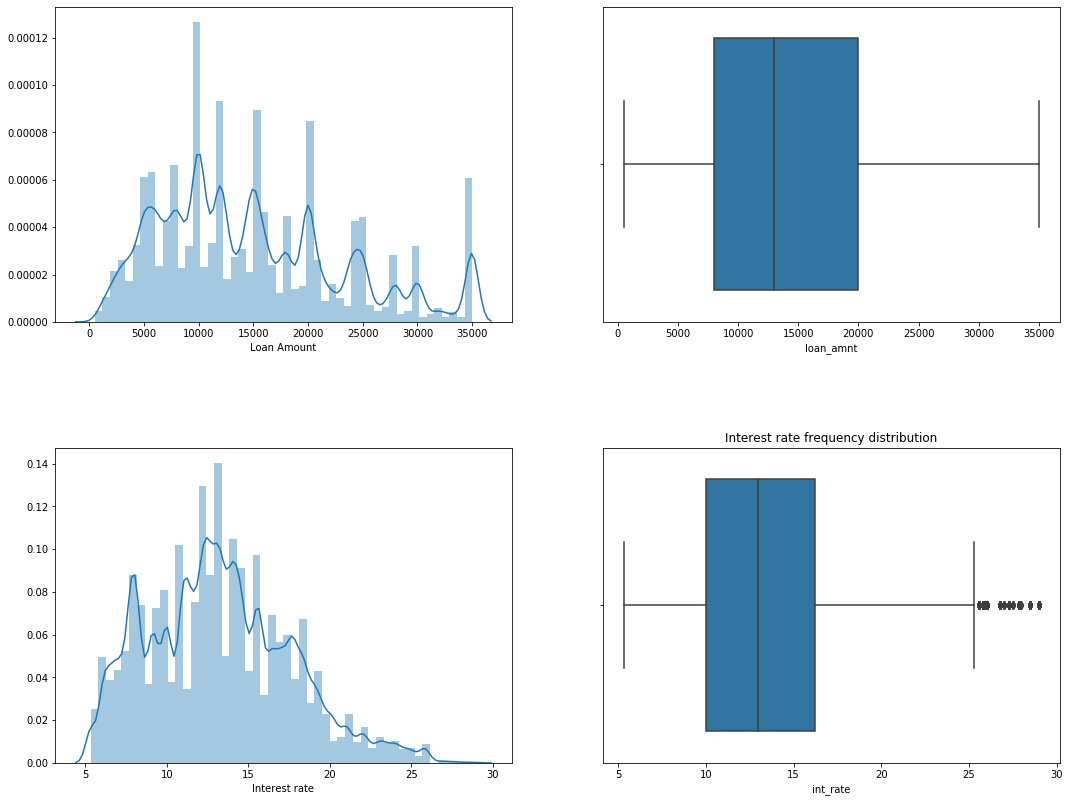

In [22]:
#plt.figure(figsize=(20,4))
fig, ax =plt.subplots(2,2,figsize=(18,12))
plt.subplots_adjust(hspace = 0.4, top = 1.0)
#Histogram
#plt.subplot(1,4,1)
sns.distplot(data['loan_amnt'],axlabel="Loan Amount",label="Loan Amount frequency distribution",ax=ax[0][0])
plt.title('Loan Amount frequency distribution')
#Boxplot
#plt.subplot(1,4,2)
sns.boxplot(x=data['loan_amnt'],ax=ax[0][1])
plt.title('Loan Amount frequency distribution')


#Histogram
#plt.subplot(1,4,3)
sns.distplot(data['int_rate'],axlabel="Interest rate",label="Interest frequency distribution",ax=ax[1][0])
plt.title('Interest rate frequency distribution')
#Boxplot
#plt.subplot(1,4,4)
sns.boxplot(x=data['int_rate'],ax=ax[1][1])
plt.title('Interest rate frequency distribution')

plt.show()
fig.savefig("LoanAmountFrequency.pdf")


# Converting the Issue_d as date type

In [23]:
data['issue_date'] = pd.to_datetime(data['issue_d'])

data[['issue_d','issue_date']].head()

,issue_d,issue_date
0,Dec-2011,2011-12-01
1,Dec-2011,2011-12-01
2,Dec-2011,2011-12-01
3,Dec-2011,2011-12-01
4,Dec-2011,2011-12-01


In [24]:
#data['issue_year_quart'] = (data['issue_date'].dt.year +"/"+ data['issue_date'].dt.quarter)

#pd.DataFrame([data['issue_date'].dt.year]).head()

#pd.DataFrame[data['issue_date'].dt.quarter]])].head()

data['issue_year'] = data['issue_date'].dt.year
data['issue_quarter'] = data['issue_date'].dt.quarter

In [25]:
data[['issue_year','issue_quarter']].dtypes

data['issue_year_quarter'] = data['issue_year'].astype(str)+"/"+data['issue_quarter'].astype(str)

In [26]:
data['issue_year_quarter'].sample(10)

135906    2013/2
611800    2015/3
477559    2015/4
262918    2014/4
136674    2013/2
634568    2015/3
76813     2013/4
15286     2011/2
158103    2013/1
276169    2014/4
Name: issue_year_quarter, dtype: object

In [27]:
numbofloansovertime = data[['issue_year_quarter','loan_amnt']].groupby('issue_year_quarter').count().reset_index()
numbofloansovertime.columns=['issue_time','num_of_loans']
numbofloansovertime.head()

,issue_time,num_of_loans
0,2007/2,24
1,2007/3,190
2,2007/4,389
3,2008/1,1013
4,2008/2,498


#### Analysing loan amount and interest rate over time

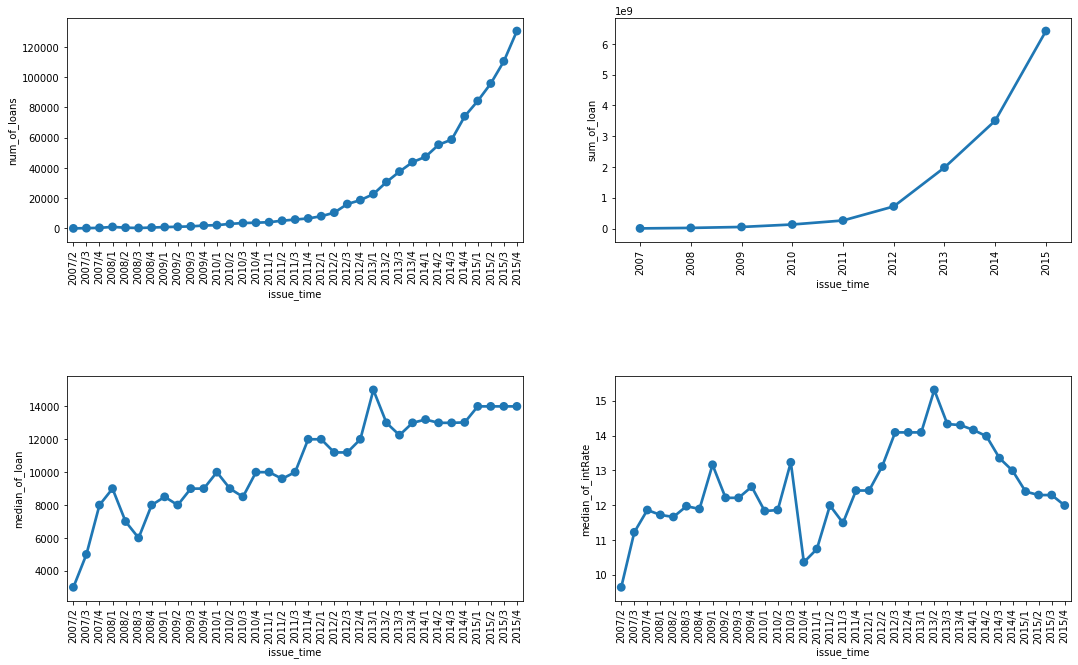

In [29]:
fig, ax = plt.subplots(2,2,figsize=(18,12))
plt.subplots_adjust(hspace = 0.6, top = 0.8)
#Number of loans over year quarter
#Point plot
numbofloansovertime = data[['issue_year_quarter','loan_amnt']].groupby('issue_year_quarter').count().reset_index()
numbofloansovertime.columns=['issue_time','num_of_loans']
s0=sns.pointplot(x=numbofloansovertime['issue_time'],y=numbofloansovertime['num_of_loans'],ax=ax[0][0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=90)

#Sum of Loan amount over year

#Point plot
sumOfLoanAmount = data[['issue_year','loan_amnt']].groupby('issue_year').sum().reset_index()
sumOfLoanAmount.columns=['issue_time','sum_of_loan']
s1=sns.pointplot(x=sumOfLoanAmount['issue_time'],y=sumOfLoanAmount['sum_of_loan'],ax=ax[0][1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)

#Median loan amount over year quarter

#Point plot
medianOfLoanAmount = data[['issue_year_quarter','loan_amnt']].groupby('issue_year_quarter').median().reset_index()
medianOfLoanAmount.columns=['issue_time','median_of_loan']
s2=sns.pointplot(x=medianOfLoanAmount['issue_time'],y=medianOfLoanAmount['median_of_loan'],ax=ax[1][0])
s2.set_xticklabels(s2.get_xticklabels(),rotation=90)

#Median Interest rate group by issue_year_quarter

medianOfintRate = data[['issue_year_quarter','int_rate']].groupby('issue_year_quarter').median().reset_index()
medianOfintRate.columns=['issue_time','median_of_intRate']
s3=sns.pointplot(x=medianOfintRate['issue_time'],y=medianOfintRate['median_of_intRate'],ax=ax[1][1])
s3.set_xticklabels(s3.get_xticklabels(),rotation=90)


plt.show()

fig.savefig("LoanPatternOverTime.pdf")

# Loan counts group by loan status

In [82]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [95]:
loan_status_count = data[['loan_status','loan_amnt']].groupby('loan_status').count().reset_index().sort_values(by='loan_amnt',ascending=False)
loan_status_count.columns = ['loan_status','loan_count']
loan_status_count

,loan_status,loan_count
1,Current,601779
5,Fully Paid,207723
0,Charged Off,45248
9,Late (31-120 days),11591
7,Issued,8460
6,In Grace Period,6253
8,Late (16-30 days),2357
4,Does not meet the credit policy. Status:Fully ...,1988
2,Default,1219
3,Does not meet the credit policy. Status:Charge...,761


# Default loan count group by verification_status

In [97]:
default_loan_count = data[data['loan_status']=='Default'].groupby('verification_status')['loan_amnt'].count().reset_index().sort_values(by='loan_amnt',ascending=False)
default_loan_count.columns = ['verification_status','loan_count']
default_loan_count

,verification_status,loan_count
2,Verified,479
1,Source Verified,462
0,Not Verified,278


# Analysing loans over loan status

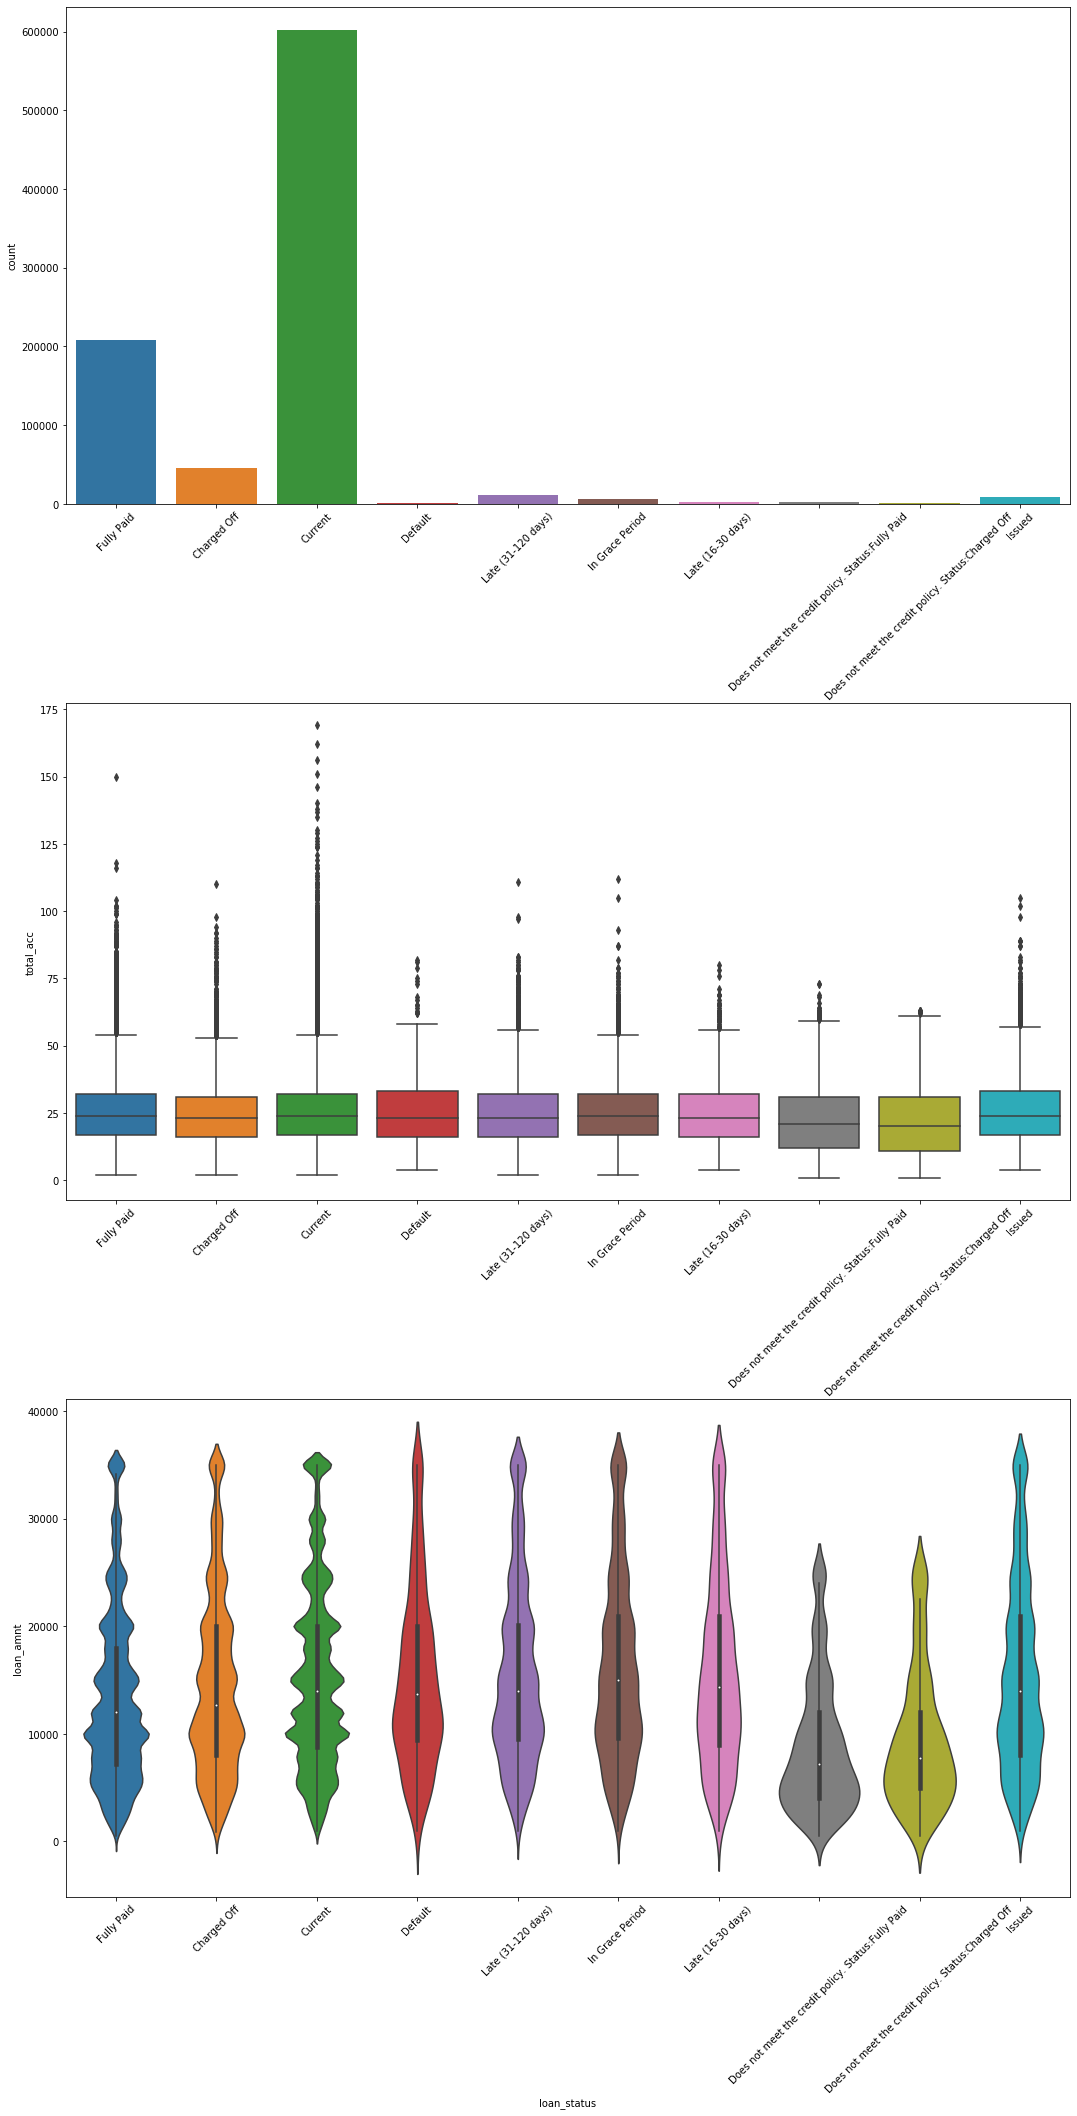

In [98]:
fig, ax =plt.subplots(3,1,figsize=(18,30))
plt.subplots_adjust(hspace = 0.4, top = 1.0)

#Count plot
s0 = sns.countplot(x="loan_status", data=data,ax=ax[0])
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

#Box Plot
s1 = sns.boxplot(x="loan_status", y="total_acc", data=data,ax=ax[1])
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

#violinplot
s2 = sns.violinplot(x="loan_status", y="loan_amnt", data=data,ax=ax[2] , estimator=sum)
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)

plt.show()

fig.savefig("LoanOveroanStatus.pdf")

### Analysing loan amount distribution for each grade , factored over sub grade
This shows a linear relationship between loan amount and customer credit rating. Notice here that requested amount is slighlty higher for the low rating customers.

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


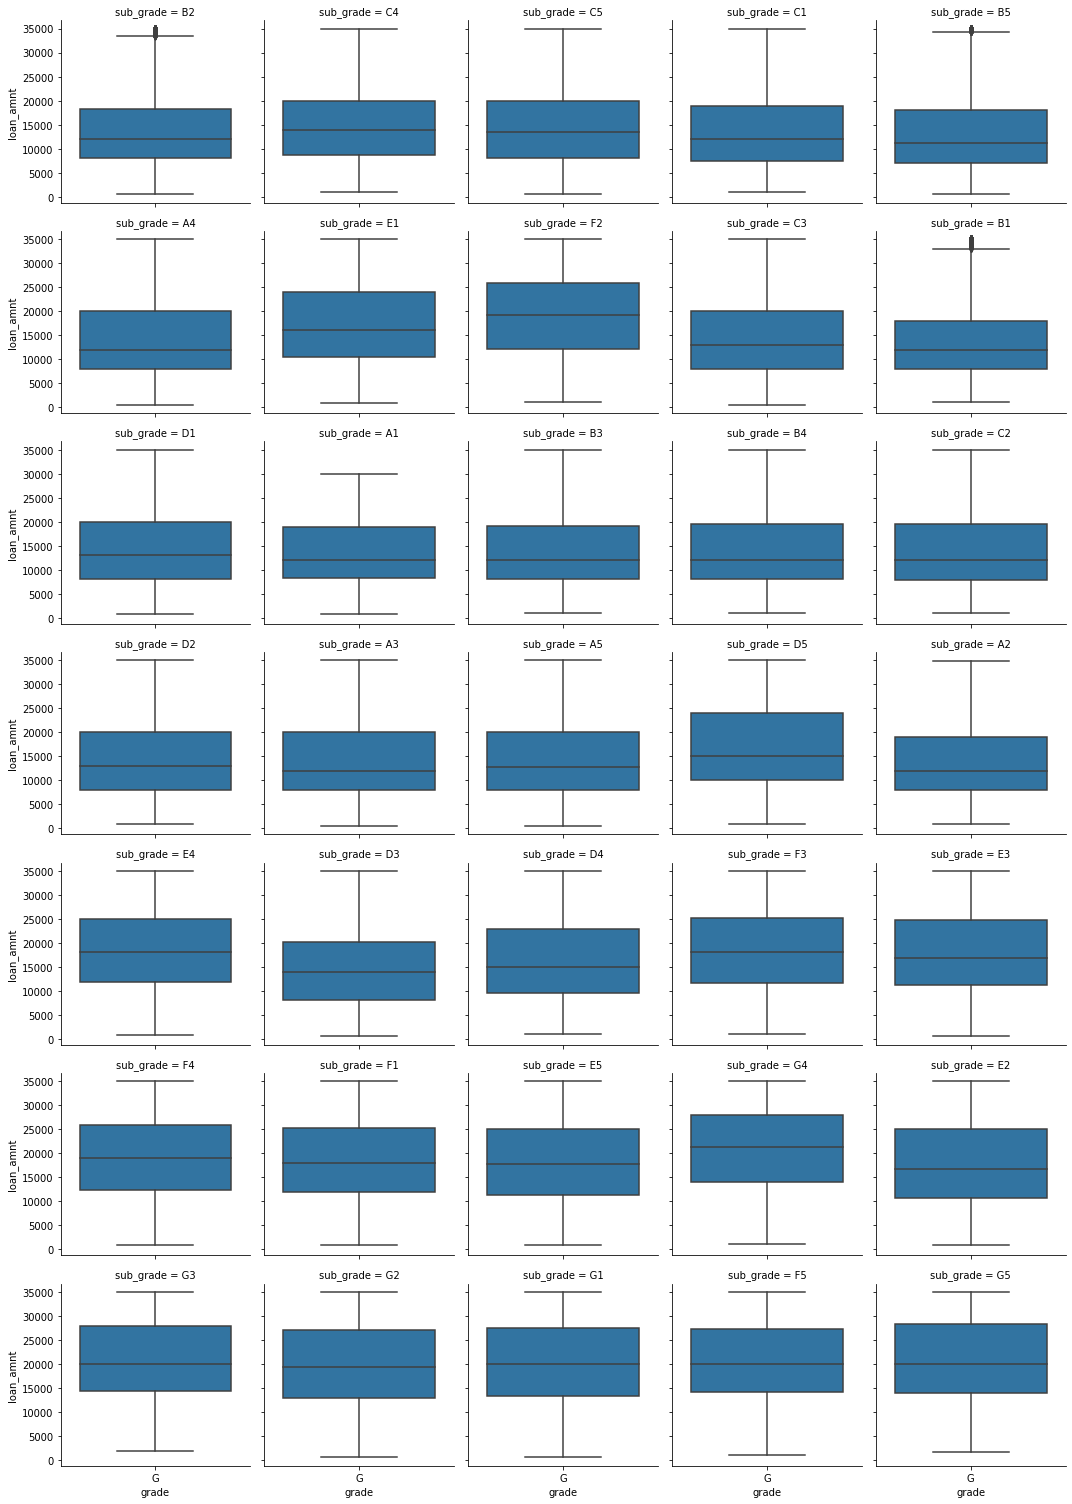

In [100]:
g = sns.FacetGrid(data, col="sub_grade", sharex=True, col_wrap=5)
g.map(sns.boxplot, 'grade', 'loan_amnt')
g.savefig("Facegrid_loanamount.pdf")

### Analysing Loan interest rate distribution for each grade , factored over subgrade
this shows the interest rates goes high for low credit rating customers.

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


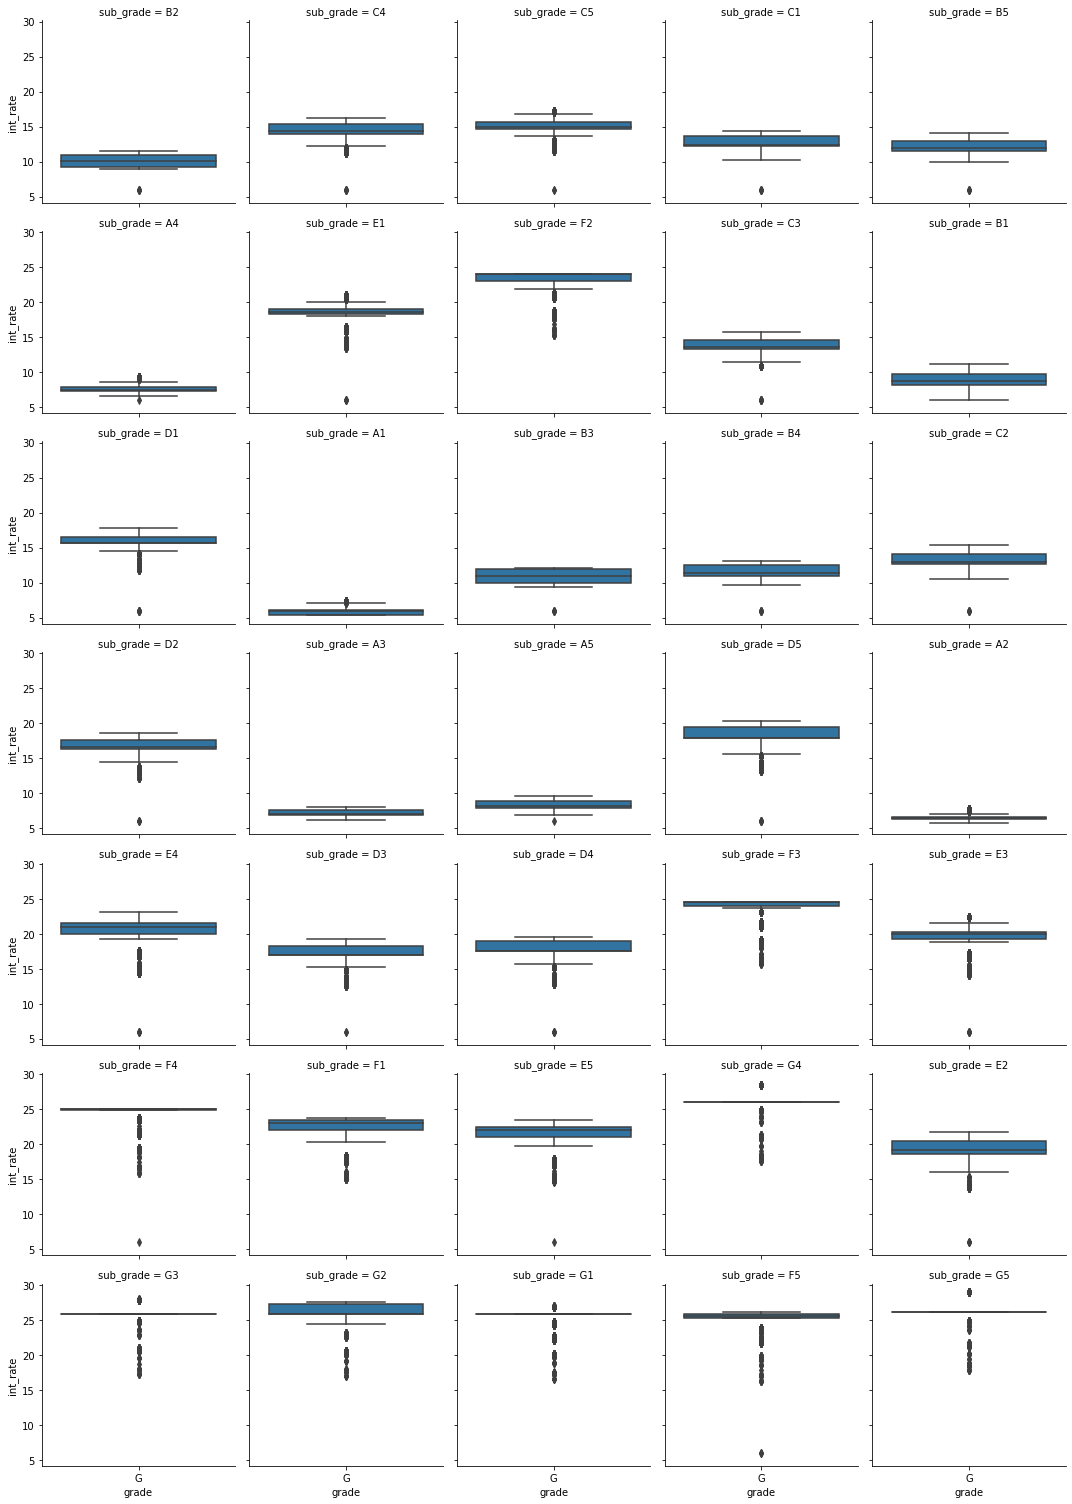

In [101]:
g = sns.FacetGrid(data, col="sub_grade", sharex=True, col_wrap=5)
g.map(sns.boxplot, 'grade', 'int_rate')
g.savefig("Facegrid_loanIntRate.pdf")

# Analysing loans by its purpose

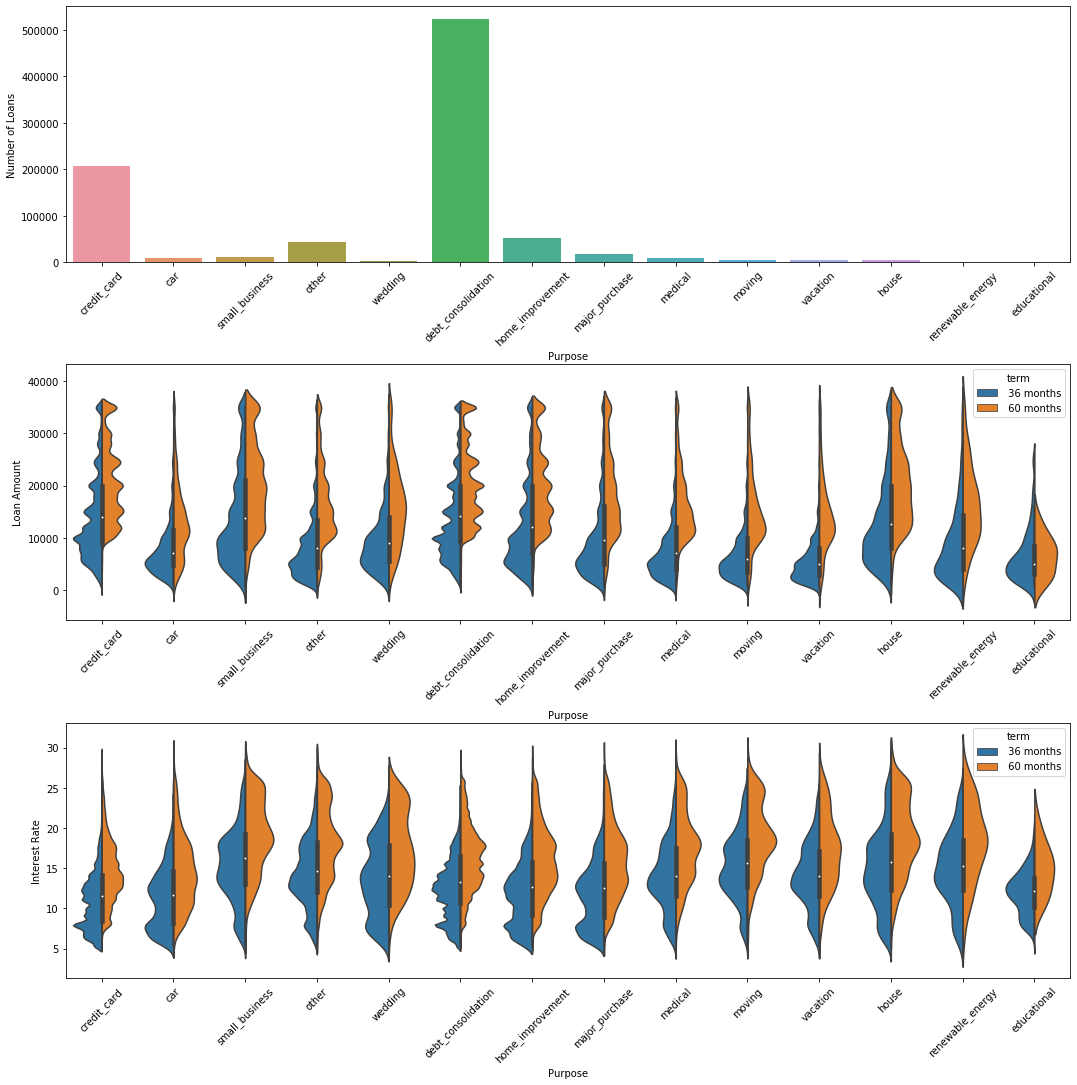

In [102]:
fig, ax=plt.subplots(3,1,figsize=(18,20))
plt.subplots_adjust(hspace = 0.4, top = 0.8)


s0 = sns.countplot(x="purpose",data=data,ax=ax[0])
s0.set(xlabel='Purpose',ylabel='Number of Loans')
s0.set_xticklabels(s0.get_xticklabels(),rotation=45)

s1 = sns.violinplot(x="purpose",y="loan_amnt",data=data, ax=ax[1], hue="term", split=True)
s1.set(xlabel='Purpose',ylabel='Loan Amount')
s1.set_xticklabels(s1.get_xticklabels(),rotation=45)

s2 = sns.violinplot(x="purpose",y="int_rate",data=data, ax=ax[2], hue="term", split=True)
s2.set(xlabel='Purpose',ylabel='Interest Rate')
s2.set_xticklabels(s2.get_xticklabels(),rotation=45)


plt.show()

fig.savefig("LoansByPurpose.pdf")

# Preparing data for learning model

In [13]:
data.shape

(887379, 55)

In [14]:
#Checking the cardinality of the categorical variables
def cate_cardinal(data_loc,variable):
    print(variable,"  ",len(data_loc[variable].unique()))


In [15]:
for var in categorical:
    cate_cardinal(data,var)

term    2
grade    7
sub_grade    35
emp_title    299272
emp_length    12
home_ownership    6
verification_status    3
issue_d    103
loan_status    10
pymnt_plan    2
url    887379
purpose    14
title    63145
zip_code    935
addr_state    51
earliest_cr_line    698
initial_list_status    2
last_pymnt_d    99
next_pymnt_d    101
last_credit_pull_d    104
application_type    2


In [24]:
# From this application_type,initial_list_status,pymnt_plan,term has two unique values.
# Let's check values and their distribution.
print(data['term'].value_counts())

print(data['pymnt_plan'].value_counts())

print(data['initial_list_status'].value_counts())

print(data['application_type'].value_counts())

categorical

 36 months    621125
 60 months    266254
Name: term, dtype: int64
n    887369
y        10
Name: pymnt_plan, dtype: int64
f    456848
w    430531
Name: initial_list_status, dtype: int64
INDIVIDUAL    886868
JOINT            511
Name: application_type, dtype: int64


['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

#### these 4 features can be deleted from the feature space and along with this date fields and extra fields added as part of Eplanatory data analysis can be removed.
#### ZIP_code can be removed and addr_state will be retained. 
#### deleting remaining date fields as well. Because transaction dates will not provide any significance information to predict the defaulters.

In [16]:
category_dropcol = ['term','pymnt_plan','initial_list_status','application_type','issue_d',
                    'issue_date','issue_year','issue_quarter','issue_year_quarter','last_pymnt_d',
                    'next_pymnt_d','last_credit_pull_d','zip_code','url']

data.drop(columns=category_dropcol,inplace=True)

In [17]:
data.shape

(887379, 41)

#### Now total feature space is came down to 41.
#### identifying the numerical and categorical features from this list.

In [18]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 11 categorical variables


In [19]:
# make a list of the numerical variables first
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 30 numerical variables


In [20]:
# find the discrete variables in Numeric variables
discrete = []

for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

collections_12_mths_ex_med  values:  [ 0. nan  1.  2.  4.  3.  6. 16. 20.  5.  7. 10. 14.]
policy_code  values:  [1.]
acc_now_delinq  values:  [ 0.  1. nan  2.  3.  5.  4.  6. 14.]

There are 3 discrete variables


In [34]:
categorical

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'title',
 'addr_state',
 'earliest_cr_line']

In [35]:
numerical

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'policy_code',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [36]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off', 'Issued'],
      dtype=object)

In [30]:
#Adding the label column to dataframe , 1 - default or 0 - paid/current
data['isDefault'] = np.where(data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)','Late (16-30 days)',
                                                    'Does not meet the credit policy. Status:Charged Off' ]),1,0)

In [31]:
data['isDefault'].value_counts()

0    826203
1     61176
Name: isDefault, dtype: int64

In [38]:
data[['isDefault','loan_status']].head(20)

,isDefault,loan_status
0,0,Fully Paid
1,1,Charged Off
2,0,Fully Paid
3,0,Fully Paid
4,0,Current
5,0,Fully Paid
6,0,Current
7,0,Fully Paid
8,1,Charged Off
9,1,Charged Off


In [22]:
## Removing the loan status to avoid data leakage because it is already used in defining the class variable isDefault
data.drop(columns=['loan_status'],inplace=True)


In [148]:
data.shape
#data.drop(columns=['url'],inplace=True)

In [23]:
data.drop(columns=['earliest_cr_line'],inplace=True)

In [24]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 9 categorical variables


# Missing Data imputation


In [25]:
#Categorical features.
#Here missing data is very less.
#Hence removing the rows with NA
print(data[categorical].isnull().mean() )

print(data.shape)

print(data.dropna(subset=categorical,how='any').shape)

print(data.dropna(subset=categorical,how='any')['isDefault'].value_counts())

print(data['isDefault'].value_counts())



grade                  0.000000
sub_grade              0.000000
emp_title              0.057993
emp_length             0.050514
home_ownership         0.000000
verification_status    0.000000
purpose                0.000000
title                  0.000171
addr_state             0.000000
dtype: float64
(887379, 40)
(835386, 40)
0    778768
1     56618
Name: isDefault, dtype: int64
0    826203
1     61176
Name: isDefault, dtype: int64


In [26]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data['isDefault'],
    test_size=0.3,
    random_state=42)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((621165, 40), (266214, 40), (621165,), (266214,))

# Imputing missing values for Categorical Variables

In [27]:
#y_train.value_counts()
#Imputing missing values for categorical features emp_title ,title,emp_length
X_train['emp_title'].fillna('Missing',inplace=True)
X_test['emp_title'].fillna('Missing',inplace=True)
X_train['emp_length'].fillna('Missing',inplace=True)
X_test['emp_length'].fillna('Missing',inplace=True)
X_train['title'].fillna('Missing',inplace=True)
X_test['title'].fillna('Missing',inplace=True)

print(X_train[categorical].isnull().mean())

print(X_test[categorical].isnull().mean())

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
purpose                0.0
title                  0.0
addr_state             0.0
dtype: float64
grade                  0.0
sub_grade              0.0
emp_title              0.0
emp_length             0.0
home_ownership         0.0
verification_status    0.0
purpose                0.0
title                  0.0
addr_state             0.0
dtype: float64


### Imputing missing values for Numerical Variables.


In [45]:
#Checking the NaN numerical features 
X_train[numerical].isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
int_rate                      0.000000
installment                   0.000000
annual_inc                    0.000005
dti                           0.000000
delinq_2yrs                   0.000037
inq_last_6mths                0.000037
open_acc                      0.000037
pub_rec                       0.000037
revol_bal                     0.000000
revol_util                    0.000591
total_acc                     0.000037
out_prncp                     0.000000
out_prncp_inv                 0.000000
total_pymnt                   0.000000
total_pymnt_inv               0.000000
total_rec_prncp               0.000000
total_rec_int                 0.000000
total_rec_late_fee            0.000000
recoveries                    0.000000
collection_recovery_fee       0.000000
last_pymnt_amnt               0.000000
collections_12_mths_ex_med    0.000151
policy_code              

In [28]:
#Identifying the missing value features 
numeric_missing = X_train.columns[X_train.isnull().mean()*100 > 0 ].to_list()


In [47]:
numeric_missing

['annual_inc',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_util',
 'total_acc',
 'collections_12_mths_ex_med',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

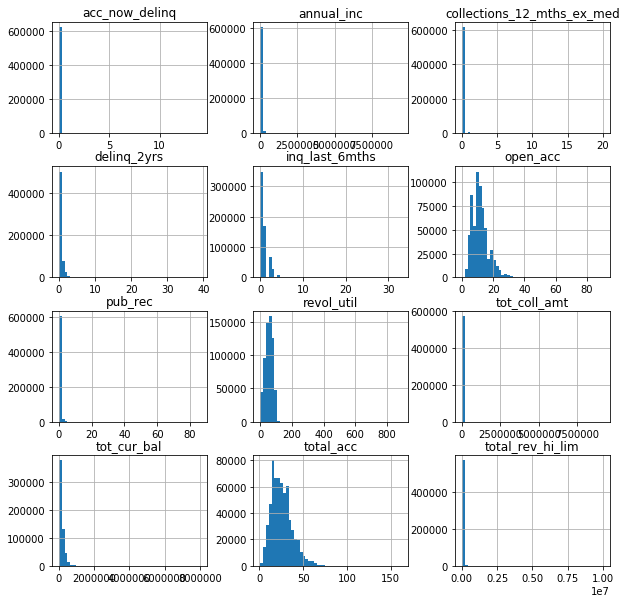

In [48]:
#Lets plot the distribution of the missing numeric variables
X_train[numeric_missing].hist(bins=50, figsize=(10,10))

plt.show()

In [49]:
X_train[numeric_missing].head(20)

,annual_inc,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
886935,35000.0,0.0,2.0,9.0,0.0,89.4,13.0,0.0,0.0,0.0,14847.0,8400.0
257156,66000.0,1.0,0.0,5.0,0.0,75.0,17.0,0.0,0.0,0.0,208403.0,12100.0
865655,35000.0,0.0,0.0,6.0,0.0,71.9,15.0,0.0,0.0,205.0,33548.0,16000.0
690570,70000.0,1.0,0.0,12.0,1.0,25.4,23.0,2.0,0.0,1895.0,79092.0,8300.0
821013,30000.0,1.0,0.0,6.0,0.0,67.2,13.0,0.0,0.0,0.0,135155.0,19600.0
261903,45000.0,0.0,1.0,21.0,0.0,8.6,44.0,0.0,0.0,0.0,208816.0,14900.0
158887,64000.0,0.0,2.0,12.0,0.0,71.3,21.0,0.0,0.0,0.0,165633.0,23400.0
545854,70800.0,1.0,0.0,11.0,0.0,31.2,32.0,0.0,0.0,0.0,44564.0,32100.0
117614,82000.0,1.0,0.0,5.0,0.0,74.0,16.0,0.0,0.0,78.0,29128.0,6400.0
217721,33700.0,0.0,0.0,11.0,0.0,73.2,13.0,0.0,0.0,NaN,NaN,NaN


In [202]:
X_train[numeric_missing].median()

annual_inc                    65000.0
delinq_2yrs                       0.0
inq_last_6mths                    0.0
open_acc                         11.0
pub_rec                           0.0
revol_util                       56.0
total_acc                        24.0
collections_12_mths_ex_med        0.0
acc_now_delinq                    0.0
tot_coll_amt                      0.0
tot_cur_bal                   80528.0
total_rev_hi_lim              23700.0
dtype: float64

In [29]:
#Imputing the missing details with median value.
for var in numeric_missing:
    median1 = X_train[var].median()
    print("feature is ",var ,"median is ",median1)
    X_train[var].fillna(median1,inplace=True)
    X_test[var].fillna(median1,inplace=True)

feature is  annual_inc median is  65000.0
feature is  delinq_2yrs median is  0.0
feature is  inq_last_6mths median is  0.0
feature is  open_acc median is  11.0
feature is  pub_rec median is  0.0
feature is  revol_util median is  56.0
feature is  total_acc median is  24.0
feature is  collections_12_mths_ex_med median is  0.0
feature is  acc_now_delinq median is  0.0
feature is  tot_coll_amt median is  0.0
feature is  tot_cur_bal median is  80528.0
feature is  total_rev_hi_lim median is  23700.0


In [30]:
#Checking the missing values in X_train and X_test data frames.
print(X_train.isnull().sum())
print(X_test.isnull().sum())

#From this missing data imputation is completed.

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
purpose                       0
title                         0
addr_state                    0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

In [31]:
X_train.shape,X_test.shape

((621165, 40), (266214, 40))

In [53]:
categorical

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'addr_state']

# Converting categorical feature emp_length into continuos feature

In [32]:
lbEncoder = LabelEncoder()
lbEncoder.fit(X_train['emp_length'])
X_train['emp_length'] = lbEncoder.transform(X_train['emp_length'])
X_test['emp_length'] = lbEncoder.transform(X_test['emp_length'])

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
print(X_train['emp_length'].unique())
print(X_test['emp_length'].unique())

[ 5  1  7  2  3  0 10 11  9  6  4  8]
[ 8  3  1  9  2  6 10  0  4  5 11  7]


# Engineering rare labels in categorical and discrete variables 

In [34]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')

In [35]:
# find infrequent labels in categorical variables and replace by Rare
for var in categorical:
    rare_imputation(var)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [36]:
# find infrequent labels in categorical variables and replace by Rare
# remember that we are treating discrete variables as if they were categorical
for var in discrete:
    rare_imputation(var)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


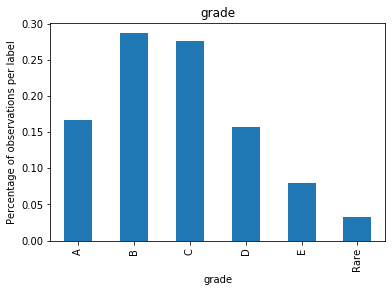

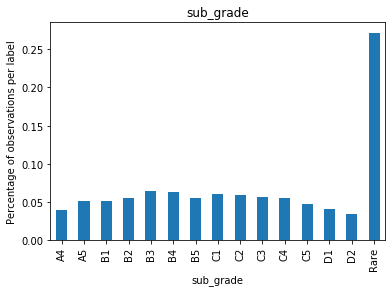

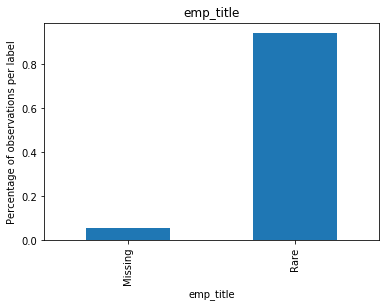

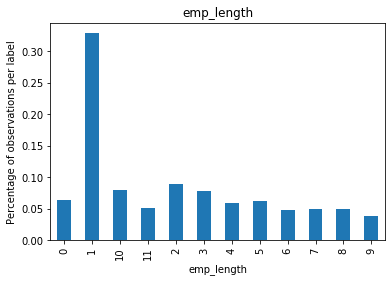

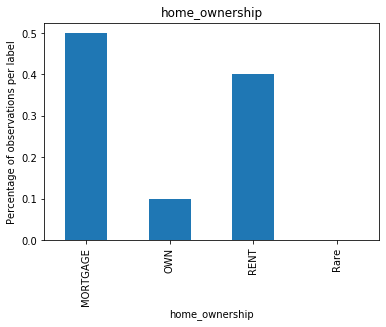

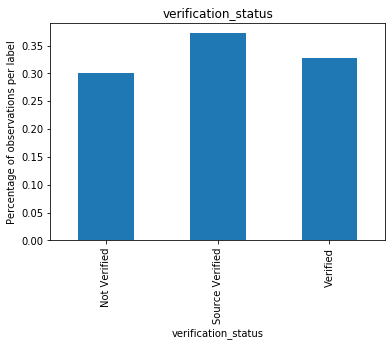

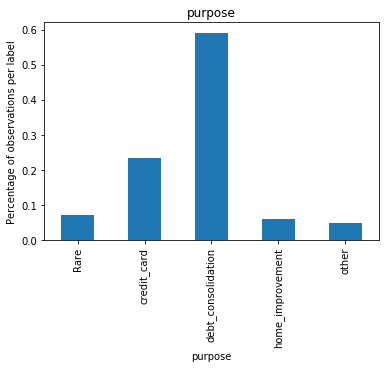

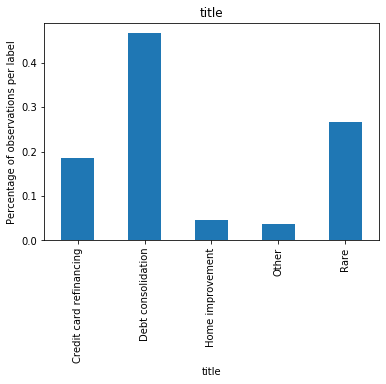

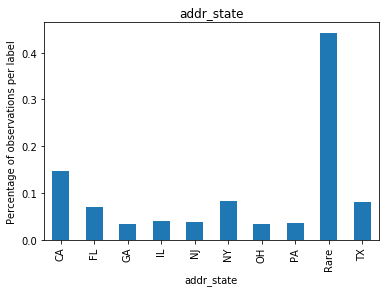

In [59]:
# let's check that it worked
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

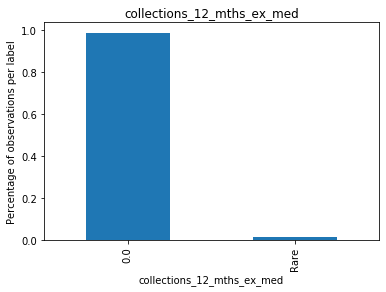

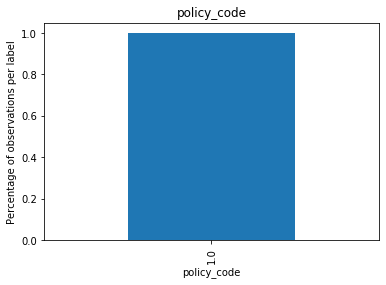

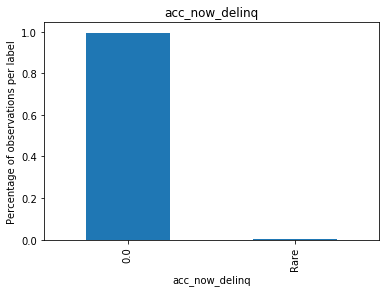

In [60]:
# let's check that it worked
for var in discrete:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

# Encoding the categorical and discrete variables (WOE- Weight of Evidence)

In [37]:
    def categories_to_woe(col):  
    # create df containing the different parts of the WoE equation
    prob_df = X_train.groupby([col])['isDefault'].mean()
    prob_df = pd.DataFrame(prob_df)
    prob_df['Paid'] = 1-prob_df.isDefault

    # remove zero values as the log of zero does not exist
    prob_df.loc[prob_df.Paid == 0, 'Paid'] = 0.00001
    prob_df.loc[prob_df.isDefault == 0, 'isDefault'] = 0.00001

    # calculate WoE
    prob_df['WoE'] = np.log(prob_df.Paid/prob_df.isDefault)
    woe = prob_df['WoE'].to_dict()

    # re-map the labels to WoE
    X_train[col] = X_train[col].map(woe)
    X_test[col] = X_test[col].map(woe)

In [62]:
categorical

['grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'addr_state']

In [63]:
discrete

['collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq']

In [38]:
# encode labels in categorical vars
for var in categorical:
    categories_to_woe(var)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [39]:
# encode labels in discretec vars
for var in discrete:
    categories_to_woe(var)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [66]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,isDefault
886935,10000.0,10000.0,10000.0,12.39,334.01,2.596105,2.735886,2.624803,2.508696,2.436735,35000.0,2.734960,2.909573,3.270520,2.630211,26.95,0.0,2.0,9.0,0.0,7513.0,89.4,13.0,7068.09,7068.09,3994.35,3994.35,2931.91,1062.44,0.0,0.0,0.0,334.01,2.602641,2.606053,2.606089,0.0,14847.0,8400.0,0
257156,20000.0,20000.0,20000.0,16.49,491.59,2.159671,2.245435,2.624803,2.739911,2.748922,66000.0,2.734960,2.564943,2.892092,2.484653,24.44,1.0,0.0,5.0,0.0,9073.0,75.0,17.0,16937.72,16937.72,6401.97,6401.97,3062.28,3339.69,0.0,0.0,0.0,491.59,2.602641,2.606053,2.606089,0.0,208403.0,12100.0,0
865655,8000.0,8000.0,8000.0,9.49,256.23,2.991266,3.126541,2.624803,2.475326,2.436735,35000.0,2.734960,2.909573,3.270520,2.751251,21.91,0.0,0.0,6.0,0.0,11499.0,71.9,15.0,5581.02,5581.02,3064.22,3064.22,2418.98,645.24,0.0,0.0,0.0,256.23,2.602641,2.606053,2.606089,205.0,33548.0,16000.0,0
690570,16000.0,16000.0,16000.0,11.53,527.85,2.991266,2.812410,2.624803,2.475326,2.436735,70000.0,2.734960,2.909573,3.270520,2.630211,13.99,1.0,0.0,12.0,1.0,2109.0,25.4,23.0,13700.68,13700.68,3156.85,3156.85,2299.32,857.53,0.0,0.0,0.0,527.85,2.893710,2.606053,2.606089,1895.0,79092.0,8300.0,0
821013,10200.0,10200.0,10200.0,18.25,370.04,1.930195,2.245435,2.624803,2.739911,2.748922,30000.0,2.758561,2.305920,2.714518,2.642589,25.16,1.0,0.0,6.0,0.0,13177.0,67.2,13.0,7897.64,7897.64,3679.72,3679.72,2302.36,1377.36,0.0,0.0,0.0,370.04,2.602641,2.606053,2.606089,0.0,135155.0,19600.0,0


In [40]:
#dropping the class label from train and test data frame
X_train.drop(columns=['isDefault'],inplace=True)
X_test.drop(columns=['isDefault'],inplace=True)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Feature Scaling

In [68]:
X_train.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,6.211650e+05,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,6.211650e+05,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,621165.000000,6.211650e+05,621165.000000,6.211650e+05,6.211650e+05,6.211650e+05
mean,14758.274734,14745.198297,14705.747362,13.244447,436.782264,2.753146,2.677789,2.608125,2.610654,2.615863,7.503637e+04,2.620332,2.621184,2.712953,2.609055,18.152665,0.313794,0.695242,11.550825,0.194914,1.691133e+04,55.051732,25.276382,8406.598064,8403.170248,7560.093385,7522.592903,5758.507067,1755.808031,0.397653,45.380634,4.847123,2161.676527,2.606500,2.606053e+00,2.606054,2.113644e+02,1.348302e+05,3.140718e+04
std,8431.670860,8426.235880,8438.339840,4.379019,244.027252,0.601566,0.424591,0.067280,0.103346,0.149741,6.633373e+04,0.179481,0.188146,0.483459,0.083799,15.215880,0.860089,0.999543,5.315925,0.577983,2.208980e+04,23.831798,11.847407,8490.695352,8487.253083,7873.961143,7848.907674,6626.909989,2094.475382,4.034001,404.931406,62.910389,4792.123910,0.033289,4.884985e-15,0.000522,1.175383e+04,1.485146e+05,3.563190e+04
min,500.000000,500.000000,0.000000,5.320000,15.670000,1.517301,2.135923,2.336708,2.428546,1.386294,0.000000e+00,2.363711,2.267880,1.951106,2.484653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.602641,2.606053e+00,2.598400,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,9.990000,260.850000,2.159671,2.245435,2.624803,2.510073,2.436735,4.500000e+04,2.363711,2.564943,1.951106,2.524831,11.910000,0.000000,0.000000,8.000000,0.000000,6.440000e+03,37.700000,17.000000,0.000000,0.000000,1911.370000,1896.240000,1200.220000,441.830000,0.000000,0.000000,0.000000,280.400000,2.602641,2.606053e+00,2.606089,0.000000e+00,3.227100e+04,1.470000e+04
50%,13000.000000,13000.000000,13000.000000,12.990000,382.550000,2.596105,2.599331,2.624803,2.599401,2.673015,6.500000e+04,2.734960,2.564943,2.892092,2.630211,17.660000,0.000000,0.000000,11.000000,0.000000,1.187200e+04,56.000000,24.000000,6466.700000,6466.010000,4896.710000,4863.840000,3216.060000,1075.000000,0.000000,0.000000,0.000000,462.610000,2.602641,2.606053e+00,2.606089,0.000000e+00,8.052800e+04,2.370000e+04
75%,20000.000000,20000.000000,20000.000000,16.200000,572.850000,2.991266,2.961626,2.624803,2.739911,2.748922,9.000000e+04,2.758561,2.727150,2.892092,2.630211,23.950000,0.000000,1.000000,14.000000,0.000000,2.081300e+04,73.500000,32.000000,13658.720000,13654.050000,10617.220000,10567.600000,8000.000000,2241.090000,0.000000,0.000000,0.000000,828.260000,2.602641,2.606053e+00,2.606089,0.000000e+00,1.958870e+05,3.780000e+04
max,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,3.793135,3.579604,2.624803,2.739911,2.748922,9.500000e+06,2.758561,2.909573,3.270520,2.816691,9999.000000,39.000000,33.000000,90.000000,86.000000,2.904836e+06,892.300000,162.000000,49372.860000,49372.860000,57777.579870,57777.580000,35000.030000,24205.620000,268.550000,31900.520000,6543.040000,36475.590000,2.893710,2.606053e+00,2.606089,9.152545e+06,8.000078e+06,9.999999e+06


In [41]:
#fit Scalar
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [42]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train,X_test

(array([[-5.64334002e-01, -5.63146129e-01, -5.57663147e-01, ...,
         -1.79826179e-02, -8.07888815e-01, -6.45690994e-01],
        [ 6.21671502e-01,  6.23624357e-01,  6.27405035e-01, ...,
         -1.79826179e-02,  4.95391181e-01, -5.41851364e-01],
        [-8.01535103e-01, -8.00500226e-01, -7.94676783e-01, ...,
         -5.41479215e-04, -6.81968465e-01, -4.32398781e-01],
        ...,
        [ 5.26791061e-01,  5.28682718e-01,  5.29636910e-01, ...,
         -1.79826179e-02, -8.01640267e-01,  1.33695590e-01],
        [ 3.84470401e-01,  3.86270260e-01,  3.84466057e-01, ...,
         -1.79826179e-02, -7.05238917e-01, -4.32398781e-01],
        [-8.10367595e-02, -7.95371558e-02, -7.47478629e-02, ...,
          5.96091797e-02, -5.66592539e-01, -8.15892210e-02]]),
 array([[-0.8015351 , -0.80050023, -0.79467678, ..., -0.01798262,
         -0.46188897, -0.69480433],
        [ 0.74027205,  0.74230141,  0.74591185, ..., -0.01798262,
         -0.36147454, -0.46327002],
        [ 0.58905635,  0.

# Machine Learning Algorithm building

### xgboost

In [79]:
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)
pred_XGB = xgb_model.predict(X_test)

confXGB = confusion_matrix(y_test,pred_XGB.round())
classXGB = classification_report(y_test,pred_XGB.round())
print('Confusion Matrix')
print(confXGB)
print("\n")
print('Classification Report' )
print(classXGB)
#print(pred_XGB)
#print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred_XGB))))
#print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred_XGB)))))

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:31:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Confusion Matrix
[[247694     49]
 [  5701  12770]]


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    247743
           1       1.00      0.69      0.82     18471

    accuracy                           0.98    266214
   macro avg       0.99      0.85      0.90    266214
weighted avg       0.98      0.98      0.98    266214



### Random Forest

In [77]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=6)
rf_model.fit(X_train, y_train)

pred_rf = rf_model.predict(X_test)
confRF = confusion_matrix(y_test,pred_rf.round())
classRF = classification_report(y_test,pred_rf.round())
print('Confusion Matrix')
print(confRF)
print("\n")
print('Classification Report' )
print(classRF)

Confusion Matrix
[[247713     30]
 [  6855  11616]]


Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    247743
           1       1.00      0.63      0.77     18471

    accuracy                           0.97    266214
   macro avg       0.99      0.81      0.88    266214
weighted avg       0.97      0.97      0.97    266214



# Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
#Fitting and training the model
logmodel.fit(X_train,y_train)
#Predicting the outcome
pred_logm = logmodel.predict(X_test)
confm = confusion_matrix(y_test,pred_logm)
classrep = classification_report(y_test,pred_logm)
print('Confusion Matrix')
print(confm)
print("\n")
print('Classification Report' )
print(classrep)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion Matrix
[[247602    141]
 [  4957  13514]]


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    247743
           1       0.99      0.73      0.84     18471

    accuracy                           0.98    266214
   macro avg       0.99      0.87      0.92    266214
weighted avg       0.98      0.98      0.98    266214



In [74]:
X_train.shape

(621165, 39)

# Regularised linear regression


In [76]:
lin_model = Lasso(random_state=2909, alpha=0.005)
lin_model.fit(X_train, y_train)

pred_lasso = lin_model.predict(X_test)
confm = confusion_matrix(y_test,pred_lasso.round())
classrep = classification_report(y_test,pred_lasso.round())
print('Confusion Matrix')
print(confm)
print("\n")
print('Classification Report' )
print(classrep)

D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.402109490783914, tolerance: 3.976903769529787
  positive)
D:\Anaconda_Distribution\envs\newEnv\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Confusion Matrix
[[     0      0      0      0      0]
 [     1 247658     84      0      0]
 [     0  11717   6510    239      5]
 [     0      0      0      0      0]
 [     0      0      0      0      0]]


Classification Report
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.95      1.00      0.98    247743
         1.0       0.99      0.35      0.52     18471
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0

    accuracy                           0.95    266214
   macro avg       0.39      0.27      0.30    266214
weighted avg       0.96      0.95      0.94    266214

